<a href="https://colab.research.google.com/github/joaomarcelofc/Data_Science_Time_Series/blob/main/S%C3%A9ries_Temporais_(Time_Series)_JM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Séries Temporais - Time Series**

Séries temporais em data science são conjuntos de dados que representam a evolução de uma variável ao longo do tempo. Esses dados são coletados em intervalos regulares (por exemplo, diariamente, semanalmente, mensalmente) e cada observação é registrada com uma marca de tempo.

As séries temporais são comumente usadas em diversas áreas, como finanças, economia, ciências sociais, climatologia, entre outras, para analisar e prever comportamentos e tendências ao longo do tempo.

A análise de séries temporais envolve a aplicação de técnicas estatísticas e matemáticas para identificar padrões, detectar sazonalidades, avaliar a presença de tendências e fazer previsões futuras com base em dados históricos.

<center>
<img src="https://img.freepik.com/fotos-gratis/conceito-de-negocio-com-a-palavra-tempo-em-cubos-de-madeira-ampulheta-e-planta_176474-8926.jpg?w=740&t=st=1678115197~exp=1678115797~hmac=f5621acf79ea17beb217fe7be8c79d2e2ebfd1231785fcc770654b2457134877" width="70%"></center>


### Como importar times series em Python

In [ ]:
# importando pacotes e setando configurações de plots
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style()

%matplotlib inline

In [ ]:
# url do dataset
dataset_path = "https://raw.githubusercontent.com/carlosfab/escola-data-science/master/datasets/electricity_consumption/Electric_Production.csv"

# importando o csv para um dataframe
df_energia = pd.read_csv(dataset_path)

# verificando as 5 primeiras entradas
df_energia.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


Nosso dataset é bastante simples e relaciona o histórico de produção de eletricidade nos Estados Unidos em um intervalo de datas entre 1985 e 2018. Escolhemos esse dataset para fins de estudo de times series, por se tratar de um conjunto bastante simples, com apenas duas features.

In [ ]:
# [ANTES] converter tipo da coluna DATE em datetime
print('[ANTES]')
display(df_energia.DATE.head())
df_energia.dtypes

[ANTES]


0    01-01-1985
1    02-01-1985
2    03-01-1985
3    04-01-1985
4    05-01-1985
Name: DATE, dtype: object

DATE      object
Value    float64
dtype: object

In [ ]:
# [DEPOIS] converter tipo da coluna DATE em datetime
print('[DEPOIS]')
display(pd.to_datetime(df_energia.DATE, format="%m-%d-%Y").head())

[DEPOIS]


0   1985-01-01
1   1985-02-01
2   1985-03-01
3   1985-04-01
4   1985-05-01
Name: DATE, dtype: datetime64[ns]

In [ ]:
# converter DATE para datetime e associar ao index do dataframe
df_energia.index = pd.to_datetime(df_energia.DATE, format="%m-%d-%Y")

df_energia.head()

,DATE,Value
DATE,,
1985-01-01,01-01-1985,72.5052
1985-02-01,02-01-1985,70.6720
1985-03-01,03-01-1985,62.4502
1985-04-01,04-01-1985,57.4714
1985-05-01,05-01-1985,55.3151


In [ ]:
# eliminar a coluna DATE
df_energia.drop("DATE", axis=1, inplace=True)

# verificando as 5 primeiras entradas
df_energia.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


### Visualizar séries temporais

Após convertermos a feature DATE para o formato datetime, iremos plotar algumas visualizaçõe dos nossos dados.

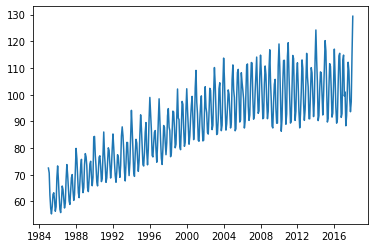

In [ ]:
# plotar gráfico de consumo de eletricidade
plt.plot(df_energia.index, df_energia.Value)

plt.tight_layout;

O plot acima nos mostra certas oscilações nos anos mas é possível verificarmos uma tendencia crescente de produção de energia elétrica ao longo dos anos.

### Como decompor uma times series em seus componentes

É possível decompor uma série temporal se você considerar a série como uma combinação aditiva ou multiplicativa dos seus componentes.

Para isso, vamos utilizar a biblioteca `stats`.

from `statsmodels.tsa.seasonal` import `seasonal_decompose`

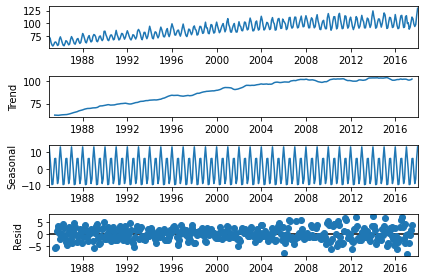

In [ ]:
# salvar a decomposição em result
result = seasonal_decompose(df_energia)

# plotar a decomposição
result.plot();

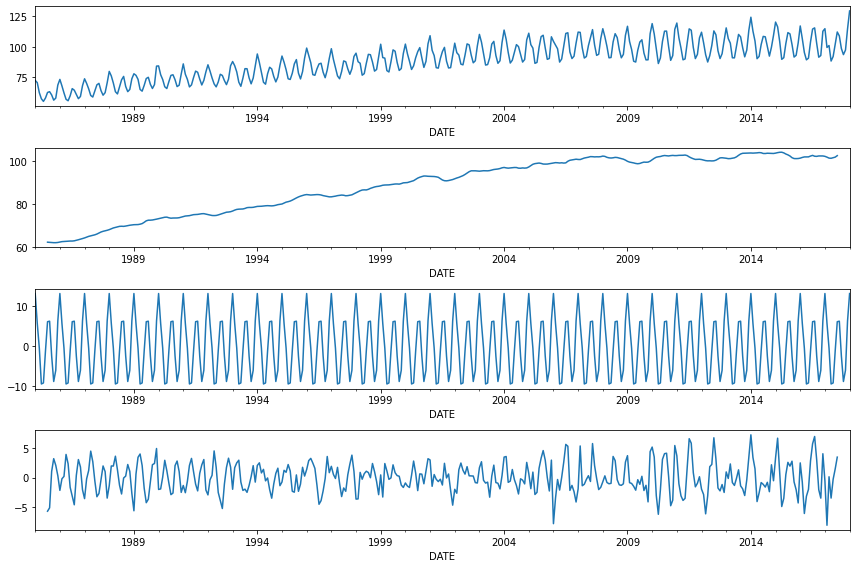

In [ ]:
# plotando a decomposição maior com melhor resolução
fig, ax = plt.subplots(4,1, figsize=(12,8))

result.observed.plot(ax=ax[0])
result.trend.plot(ax=ax[1])
result.seasonal.plot(ax=ax[2])
result.resid.plot(ax=ax[3])

plt.tight_layout()

No plot acima, mais precisamente no segundo gráfico, já é bastante claro a tendência crescente da produção de energia, apesar das oscilações nos anos.


### Análise exploratória e extração de features

Agora, utilizare um *dataset* contendo os dados de uma suposta companhia ferroviária que utiliza uma nova tecnologia de propulsão.


In [ ]:
# url do dataset
ferrovia_dataset = "https://raw.githubusercontent.com/carlosfab/escola-data-science/master/datasets/companhia_ferroviaria/trem.csv"

# importando os dados da empresa ferroviária
df_ferrovia = pd.read_csv(ferrovia_dataset)

# verificando as 5 primeiras entradas
df_ferrovia.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [ ]:
# convertendo a coluna Datetime em tipo datetime
df_ferrovia.Datetime = pd.to_datetime(df_ferrovia.Datetime, format="%d-%m-%Y %H:%M")
df_ferrovia.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


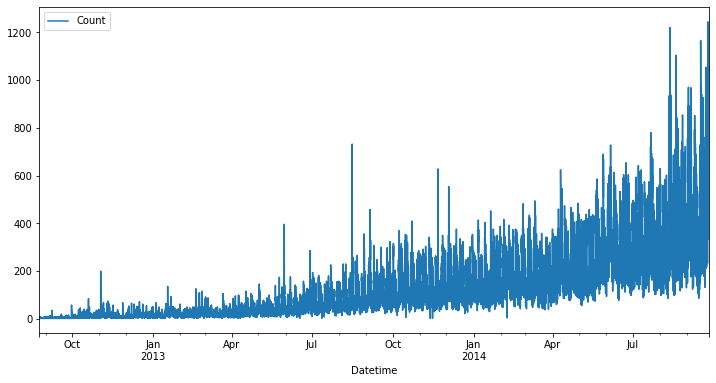

In [ ]:
# plotando o gráfico
fig, ax = plt.subplots(figsize=(12,6))
df_ferrovia.plot(x='Datetime',y='Count', ax=ax);

No plot acima verificamos também tendências de aumento ao logo dos anos. 

Mas iremos explorar um pouco mais nosso dataset, utilizando de features engineering para criarmos novas features que trarão novas informações e insights ao nosso conjunto de dados. Abaixo pontuamos algumas hipóteses que queremos verificar em nosso conjunto:

**Hipóteses:**
* Pessoas viajam mais durante a semana.
* Há horários de pico por causa das indas e vindas do trabalho.
* Há períodos do mês onde a demanda por transporte é maior.

Para isso vamos criar novas features contendo o ano, mês, dia, dia da semana e hora, em nosso dataset. Tudo isso é possível graças a conversão para o formato datetime.

In [ ]:
# criando features para cada período
df_ferrovia['year'] = df_ferrovia.Datetime.dt.year
df_ferrovia['month'] = df_ferrovia.Datetime.dt.month
df_ferrovia['day'] = df_ferrovia.Datetime.dt.day
df_ferrovia['hour'] = df_ferrovia.Datetime.dt.hour
df_ferrovia['day_of_week'] = df_ferrovia.Datetime.dt.dayofweek

In [ ]:
# verificando as 5 primeiras entradas após a criação das novas features
df_ferrovia.head()

,ID,Datetime,Count,year,month,day,hour,day_of_week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


Testando as hipóteses

* Pessoas viajam mais durante a semana

In [ ]:
# convertendo as variáveis em 0 ou 1 (weekend = 0)
df_ferrovia['weekend'] = 0
df_ferrovia.loc[(df_ferrovia.day_of_week == 5) | (df_ferrovia.day_of_week == 6), 'weekend'] = 1

In [ ]:
# verificando os valores final de semana x semana
print(df_ferrovia.weekend.value_counts())
print(df_ferrovia.weekend.value_counts() / df_ferrovia.shape[0])

0    13056
1     5232
Name: weekend, dtype: int64
0    0.713911
1    0.286089
Name: weekend, dtype: float64


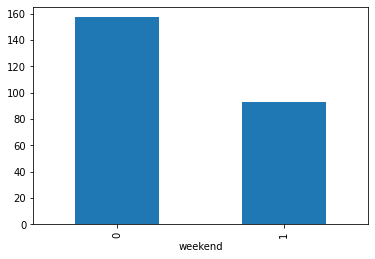

In [ ]:
# plotando os valores (final de semana x dia de semana)
df_ferrovia.groupby('weekend').Count.mean().plot.bar();

Conforme plot acima, considerando 0 como dia da semana e 1 como final de semana, verificamos que o número de viagens é maior nos dias de semana, obviamente em função do número de dias ser maior.

* Há horários de pico por causa das indas e vindas do trabalho.

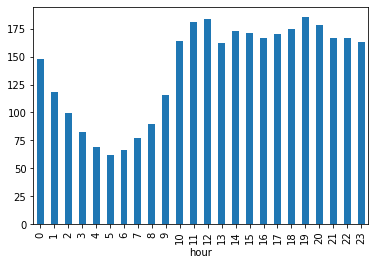

In [ ]:
# plotando os valores em função do horário
df_ferrovia.groupby('hour').Count.mean().plot.bar();

Verificamos acima que o pico maior de utilização do transporte se dá por volta de 11:00/12:00, se mantendo praticamente na mesma intensidade até as 20:00. A partir deste horário a tendência é de diminuição de utilização até as 05:00, horario com menor utilização do dia.

* Há períodos do ano onde a demanda por transporte é maior.

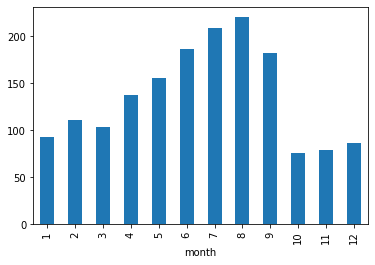

In [ ]:
# plotando os valores em função dos meses
df_ferrovia.groupby('month').Count.mean().plot.bar();

Verificamos acima que o período de Outubro/Novembro e Dezembro apresenta a menor demanda de transporte, sendo que Agosto apresenta a maior utilização no ano.

Evidentemente o dataset analisado é bastante simples, mas muito útil para uma primeira abordagem de conceitos teóricos e práticos de Time Series.

# **Técnicas de *Forecasting* para séries temporais**

O universo das Séries Temporais (TS) é gigante e complexo. Existem muitos métodos e maneiras de se realizar previsões em cima de bases históricas. 

A primeira coisa que precisamos ter em mente é que quanto maior o seu horizonte de previsão, maior a incerteza associada a ele. Quanto mais no futuro você tentar ver algo, menor será sua capacidade de inferir algo.

Para ajudar nessa tarefa, existem desde técnicas simples (qual será o valor da sua conta de celular no próximo mês) e metodologias altamente complexas e com conceitos estatísticos mais pesados (qual o risco de um tornado atingir aquela cidade).

Vamos dar uma olhada nos principais modelos básicos. Usaremos novamente a mesma base de dados da produção de energia elétrica.

Incluir imagem

In [ ]:
# importando os pacotes não importados anteriormente
from sklearn.metrics import mean_squared_error
sns.set_style()

%config InlineBackend.figure_format = 'svg'

In [ ]:
# verificando as 5 primeiras entradas do dataset
df_energia.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


#### **Naive Approach**

No "Modelo Ingênuo", a previsão de $P_{T+1}$ é apenas uma mera observação do período imediatamente anterior ($P_T$). Pense, qual seria o melhor chute para você dizer quanto viria a conta de celular no próximo mês?!

<br>
<center>
<img src="https://miro.medium.com/max/974/1*aVBE9ixa9HEV4Zd3keZE4A.png" width="400px">
</center>

Partir da premissa que "o futuro repetirá o passado", mesmo que soe como algo ingênuo, serve como um *benchmark*, um *baseline* inicial. E por que isso?

Imagine que você construa um modelo com todas as técnicas mais avançadas, treina redes neurais profundas em cima de GPUs da AWS por dias... para descobrir que ele foi pior que um modelo Naive?

In [ ]:
# verificando a data máxima
data_maxima = df_energia.index.max()
data_minima = df_energia.index.min()
print(data_minima)
print(data_maxima)

1985-01-01 00:00:00
2018-01-01 00:00:00


In [ ]:
# estabeleceremos como corte a data de '2012-8-1' e vamos separar treino e validação
train = df_energia[df_energia.index <= '2012-8-1']
valid = df_energia[df_energia.index > '2012-8-1']

# criando um dataframe para armazenar as previsões
y_hat = valid.copy()

Exclusivamente por causa da didática, vou dividir o conjunto de dados em dois.

Vou utilizar períodos amplos para que a aplicação dos métodos seja perceptível visualmente.

In [ ]:
# copiando o último valor do dataset train e atribuindo a y_hat['naive']
y_hat['naive'] = train.iloc[-1].values[0]
y_hat.head()

,Value,naive
DATE,,
2012-09-01,96.7431,109.8601
2012-10-01,90.3805,109.8601
2012-11-01,94.3417,109.8601
2012-12-01,105.2722,109.8601
2013-01-01,115.5010,109.8601


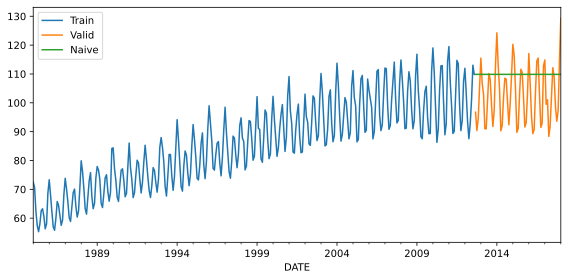

In [ ]:
# plotando train e valid
fig, ax = plt.subplots(figsize=(8,4))
train.plot(ax=ax)
valid.plot(ax=ax)
y_hat['naive'].plot(ax=ax)
ax.legend(['Train', 'Valid', 'Naive'])
plt.tight_layout()

In [ ]:
# calculando o erro da previsão RMSE
print('Erro do método Naive Method:')
mean_squared_error(y_hat.Value, y_hat.naive, squared=True)

Erro do método Naive Method:


144.18290826476925

O método Naive é simples mas utilizado em trabalhos cientificos e metodologia e, mesmo que bastante simples, pode funcionar bem em alguns casos. 

No nosso exemplo a previsão é representada pela reta verde ao final do gráfico. Mas, em casos práticos, a cada novo período ele tem uma atualização do período imediatamente anterior, sendo que a previsão é realizada iterativamente a cada dia/mês ou qualquer outro período que esteja utilizando.

#### **Média Móvel**

Se no Método Naive nós consideramos apenas o último valor disponível, as médias móveis permitem utilizarmos uma janela de intervalo.

Se você investe na Bolsa como trader, provavelmente já usou médias móveis com valores de 7, 14, 21 dias.

Médias móveis são excelentes para suavizar curvas (e diminuir a dispersão/ruído) ou mesmo para criar novas variáveis (feature engineering).

Voltando ao exemplo da sua conta de celular, usando médias móveis nós poderíamos usar (por exemplo) as 7 últimas faturas e prever as demais.

In [ ]:
# calculando a média dos ultimos 7 valores disponíveis
y_hat['m7'] = train.Value.rolling(7).mean().iloc[-1]
y_hat.head()


,Value,naive,m7
DATE,,,
2012-09-01,96.7431,109.8601,100.1854
2012-10-01,90.3805,109.8601,100.1854
2012-11-01,94.3417,109.8601,100.1854
2012-12-01,105.2722,109.8601,100.1854
2013-01-01,115.5010,109.8601,100.1854


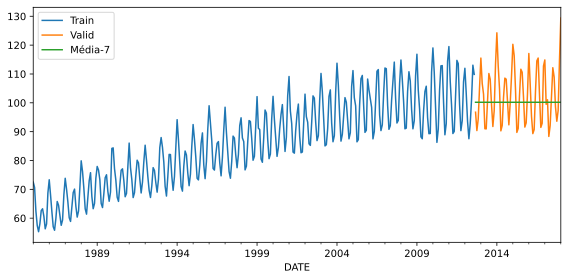

In [ ]:
# plotando train e valid
fig, ax = plt.subplots(figsize=(8,4))
train.plot(ax=ax)
valid.plot(ax=ax)
y_hat['m7'].plot(ax=ax)
ax.legend(['Train', 'Valid', 'Média-7'])
plt.tight_layout()

O comportamento da reta de previsão acima é diferente porque ao contrario método Naive, não é considerado apenas o último valor para o cálculo. É calculada uma média dos últimos dias e a partir dela é calculada a projeção. 

In [ ]:
# calculando o erro da previsão RMSE
print('Erro da Média de 7 dias:')
mean_squared_error(y_hat.Value, y_hat.m7, squared=True)

Erro da Média de 7 dias:


101.21254960492308

documentar

#### **Holt's Linear Trend Model**

Qual o problema das técnicas acima? Elas não permitem que trabalhemos com tendências (apenas o nível das séries).

Já o Holt's Linear Trend Model leva em consideração tanto o nível quanto a tendência, e tende a obter melhores resultados que as técnicas mencionadas anteriormente.

Vamos separar os componentes da Série Temporal.

In [ ]:
# importando o pacote necessário
from statsmodels.tsa.holtwinters import Holt

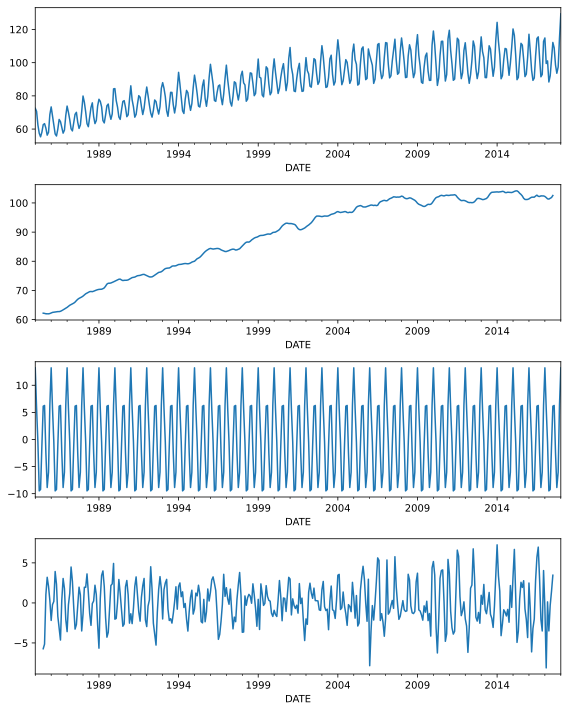

In [ ]:
# plotando a decomposição dos componentes
# plotar componentes
fig, ax = plt.subplots(4,1, figsize=(8,10))
result.observed.plot(ax=ax[0])
result.trend.plot(ax=ax[1])
result.seasonal.plot(ax=ax[2])
result.resid.plot(ax=ax[3])
plt.tight_layout()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-32-d2bcad3561c4>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  y_hat['holt'] = Holt(train.Value).fit(smoothing_level=0.1, smoothing_slope=0.1).forecast(len(valid))
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


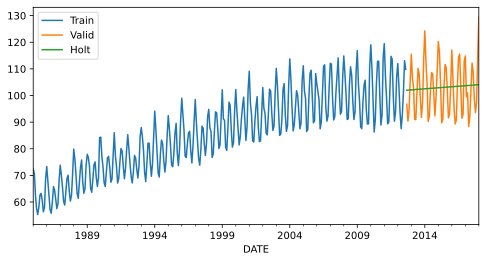

In [ ]:
# salvando os valores para o dataset valid usando Holt's
y_hat['holt'] = Holt(train.Value).fit(smoothing_level=0.1, smoothing_slope=0.1).forecast(len(valid))

# plotar train e valid
fig, ax = plt.subplots(figsize=(8,4))
train.plot(ax=ax)
valid.plot(ax=ax)
y_hat['holt'].plot(ax=ax)
ax.legend(['Train', 'Valid', 'Holt'])
plt.show();

In [ ]:
# Calcular o erro
print("Erro do Holt's Linear Trend Model:")
mean_squared_error(valid.Value, y_hat.holt, squared=True)

Erro do Holt's Linear Trend Model:


93.79197449495065

Considerando o nível e também a tendência através do método holt's linear model, verificamos que existe um comportamento de aumento, originado da própria tendência crescente do dataset. Verificamos também que o erro é menor no método utilizado.

# **Séries temporais - Testes Estatísticos e ARIMA**

Antes de se pensar em fazer previsões e modelagens preditivas, temos de ter um conceito bem fixado: séries estacionárias.

De maneira simplificada, ser estacionária significa ter a média, variância e covariância permanecendo constante ao longo da dimensão temporal. Vamos entender visualmente o que isso significa.

<center>
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/09/ns5-e1536673990684.png" width="50%"></center>

No primeiro plot, há uma tendência de alta. Ou seja, a sua média está aumentando conforme o tempo passa. No segundo plot, apesar de não haver uma variação na tendência, a variância (não constante) está interferindo na sua amplitude. Por fim, o último exibe o comportamento típico de quando a covariância varia em função do tempo.

**E como se pareceria uma série estacionária?**

Uma TS com média, variância e covariância constante seria parecida com o plot abaixo.

<center><img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/09/ns6-e1536674898419.png" width="20%"></center>

**Como verificar se uma TS é estacionária?**

Há muitas maneiras se fazer essa verificação. Por exemplo:

* **Olhar os plots -** Em muitos casos, durante a análise exploratória você já vai identificar visualmente se uma TS é estacionária ou não.
* **Resumo estatístico -** Você pode gerar um resumo com as principais informações estatísticas da TS, e verificar se há algum indício da estacionaridade.
* **Testes estatísticos -** São testes que possuem a capacidade de nos dizer se uma TS é estacionária ou não, sempre se baseando em métodos científicos.


### Teste ADF

Como falamos anteriormente, o ADF é um dos testes estatísticos mais usados para TS. Suas hipóteses nula e alternativa são:

* A Hipótese Nula ($H_0$) do teste é que a TS não é estacionária. Ou seja, possui algum tipo de dependência em relação ao tempo.
* A Hipótese Alternativa ($H_1$) rejeita a hipótese nula, ou seja, que a TS é estacionária.

Vamos realizar o ADF em cima do *dataset* do consumo de energia elétrica.

In [ ]:
# importando o teste ADF
from statsmodels.tsa.stattools import adfuller

# importando os dados como sendo coluna única
df_est = pd.read_csv(dataset_path, index_col=0, squeeze=True)

# extraindo apenas os valores
X = df_est.values

# aplicando ADF e imprimindo o resultado
result = adfuller(X)
print(result)
print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(result[0]))
print('Valor-p: {:.4f}'.format(result[1]))
print('Valores Críticos:')
for key, value in result[4].items():
	print('\t{}: {:.4f}'.format(key, value))


(-2.2569903500472406, 0.18621469116586908, 15, 381, {'1%': -3.4476305904172904, '5%': -2.869155980820355, '10%': -2.570827146203181}, 1840.8474501627159)
Dickey-Fuller Aumentado
Teste Estatístico: -2.2570
Valor-p: 0.1862
Valores Críticos:
	1%: -3.4476
	5%: -2.8692
	10%: -2.5708


Vamos entender um pouco sobre o que está sendo verificado.

* A Hipótese Nula ($H_0$) do teste é que a TS não é estacionária. Ou seja, possui algum tipo de dependência em relação ao tempo.
* A Hipótese Alternativa ($H_1$) rejeita a hipótese nula, ou seja, que a TS é estacionária.

Interpretamos o resultado do teste usando o *valor-p* com um *threshold* que traga indícios suficientes para rejeitarmos a hipótese nula. Caso o valor do teste fique acima desse *threshold*, falharemos em rejeitar a hipótese nula e manteremos a premissa de que ela não é estacionária.

Os valores do *threshold* que irei usar são:

* $\text{Valor-p } \leq 0.05$: Rejeitamos $H_0$ e a TS é estacionária; e
* $\text{Valor-p } > 0.05$: Falhamos em rejeitar $H_0$ e a TS é não-estacionária.

Normalmente, rejeitamos $H_0$ quando o *p-value* é menor ou igual a um determinado nível de significância. Normalmente, esse nível de significância é igual a 0.01 (5%), 0.05 (5%) ou até mesmo 0.1 (10%).

Quanto menor o *p-value*, mais evidências contra a hipótese nula você tem. Por exemplo, caso seja usado $\text{p-value} = 0.05$, rejeitamos a $H_0$ com um nível de confiança de 95%. 

Caso o valor do teste fique acima do *threshold*, falharemos em rejeitar a hipótese nula. **Atenção, isso não significa que $H_0$ é verdadeira.** Significa apenas que o experimento não encontrou evidências para rejeitá-la.

#### 6.1 - Transformando uma TS em estacionária

Para transformar uma TS em estacionária, precisamos remover a tendência e a sazonalidade que há nos dados originais. Para isso, existem diversas técnicas que podem ser usadas.

Uma bom começo é aplicar o $log$ a fim de reduzirmos a magnitude dos valores da TS. Na sequência, subtraímos a média móvel de um determinado período em relação ao $log$ da TS.

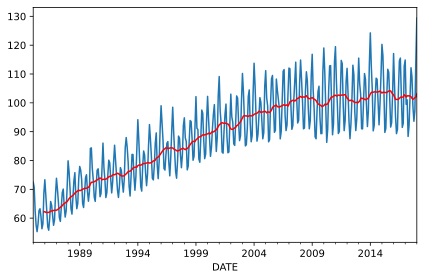

In [ ]:
# verificando o plot original
ma = df_energia.rolling(12).mean()

fig, ax = plt.subplots()
df_energia.plot(ax=ax, legend=False)
ma.plot(ax=ax, c='r', legend=False)
plt.tight_layout()

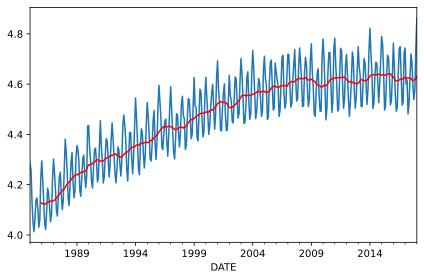

In [ ]:
# aplicando o log
df_log = np.log(df_energia)
ma_log = df_log.rolling(12).mean()

fig, ax = plt.subplots()
df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, c='r', legend=False)
plt.tight_layout()

Aplicamos o log para diminuir um pouco a extensão dos dados e reduzir a magnitude dos valores em da time series.

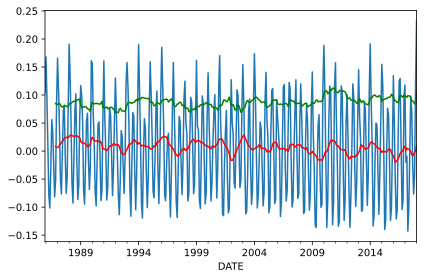

In [ ]:
# subtrair a média do log dos dados
df_sub = (df_log - ma_log).dropna()
ma_sub = df_sub.rolling(12).mean()
std_sub = df_sub.rolling(12).std()

fig, ax = plt.subplots()
df_sub.plot(ax=ax, legend=False)
ma_sub.plot(ax=ax, c='r', legend=False)
std_sub.plot(ax=ax, c='g', legend=False)
plt.tight_layout()

In [ ]:
# repetindo o ADF
X_sub = df_sub.Value.values

# aplicar ADF e imprimir o resultado
result_sub = adfuller(X_sub)
print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(result_sub[0]))
print('Valor-p: {:.10f}'.format(result_sub[1]))
print('Valores Críticos:')
for key, value in result_sub[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Dickey-Fuller Aumentado
Teste Estatístico: -5.2116
Valor-p: 0.0000083256
Valores Críticos:
	1%: -3.4481
	5%: -2.8694
	10%: -2.5709


Olhando os resultados tanto do teste estatístico quanto o gráfico acima, podemos verificar que a tendência foi removida, tornando a série estacionária.

#### 6.2 - Diferenciação

Uma outra técnica simples que ajuda a tornar TS mais estacionárias é a diferenciação.

Apenas calculando a diferença entre duas observações possíveis, é possível incrementar ainda mais o desempenho no ADF.

$$value(t) = observation(t) - observation(t -1)$$

Dickey-Fuller Aumentado
Teste Estatístico: -7.6511
Valor-p: 0.0000000000
Valores Críticos:
	1%: -3.4483
	5%: -2.8694
	10%: -2.5710


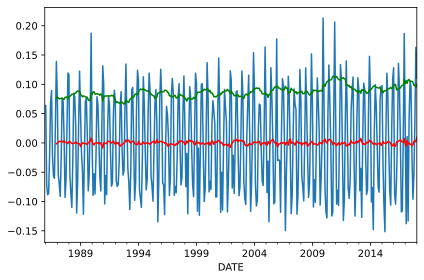

In [ ]:
# aplicando a diferenciação
df_diff = df_sub.diff(1)
ma_diff = df_diff.rolling(12).mean()
std_diff = df_diff.rolling(12).std()

fig, ax = plt.subplots()
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, c='r', legend=False)
std_diff.plot(ax=ax, c='g', legend=False)
plt.tight_layout()

# extraindo apenas os valores
X_diff = df_diff.Value.dropna().values

# aplicando ADF e imprimir o resultado
result_diff = adfuller(X_diff)
print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(result_diff[0]))
print('Valor-p: {:.10f}'.format(result_diff[1]))
print('Valores Críticos:')
for key, value in result_diff[4].items():
	print('\t{}: {:.4f}'.format(key, value))

#### 6.3 - Forecasting usando ARIMA

ARIMA significa *AutoRegressive Integrated Moving Average* e é um dos modelos mais usados para fazer previsões em cima de Séries Temporais.

É uma classe de modelo que consegue capturar um conjunto de diferentes estruturas temporais dados de TS. O acrônimo ARIMA significa:

* **AR**: *Autoregression*, pois usa a relação de dependência entre uma observação e um número de *lagged observations*.
* **I**: *Integrated*, pois usa a diferenciação das observações *raw* para transformar a TS em estacionária.
* **MA**: *Moving Average*, pois usa a dependência entre uma observação e o erro residual proveniente de uma média móvel aplicada a *lagged observations*.

Cada um desses componentes são representados por um parâmetro do modelo. Por esse fato, é muito comum ver a notação $ARIMA(p, d, q)$.

Para encontrar os parâmetros otimizados de p, d, e q, usaremos as funções ACF (Autocorrelação) e PACF (Autocorrelação Parcial).

In [ ]:
# melhores parâmetros para nosso modelo
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(df_diff.dropna(), nlags=25)
lag_pacf = pacf(df_diff.dropna(), nlags=25)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Além de plotar os gráficos para ACF e PACF, vamos plotar os limites críticos. Ou seja, 5% da autocorrelação (parcial) para TS estacionárias, $1.96 / \sqrt{(N - d)}$, onde $N$ é o número de pontos do *dataset* e $d$ é o número de vezes que diferenciamos os dados.

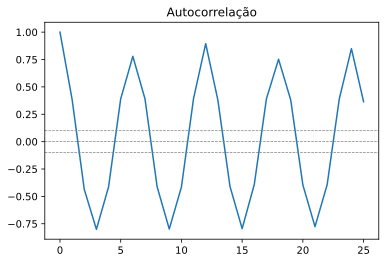

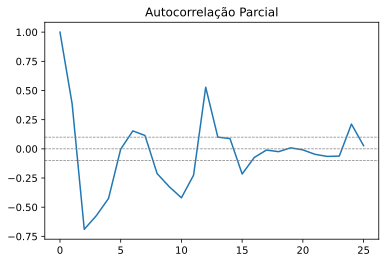

In [ ]:
# plotando ACF e PACF
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=-1.96 / np.sqrt((len(df_diff) - 1)), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=1.96 / np.sqrt((len(df_diff) - 1)), linestyle='--', color='gray', linewidth=0.7)
plt.title("Autocorrelação")
plt.show();

plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=-1.96 / np.sqrt((len(df_diff) - 1)), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=1.96 / np.sqrt((len(df_diff) - 1)), linestyle='--', color='gray', linewidth=0.7)
plt.title("Autocorrelação Parcial")
plt.show();

Os valores otimizados dos parâmetros do ARIMA são identificados ao olharmos os plots acima:

* **q:** valor onde a ACF cruza o limite superior do intervalo de confiança pela primeira vez. 
* **p:** valor onde o PACF cruza o limite superor do intervalo de confiança pela primeira vez.

Vamos agora construir o modelo ARIMA.

In [ ]:
# treinando o modelo ARIMA
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_log, order=(2,1,2))
result_AR = model.fit(disp = -1)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

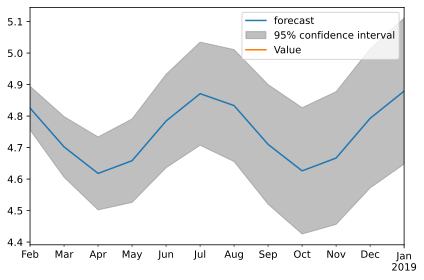

In [ ]:
# start="2018-02-01", end="2019-01-01"
result_AR.plot_predict(start="2018-02-01", end="2019-01-01")

plt.tight_layout();

Interessante observar acima que quanto mais próxima está a nossa previsão mais estreito é o nosso intervalor de confiança. 